# Aggregated Analysis




Only the studies on temperature and tea had more than one participant. Consequently, the focus of the aggregated analysis was on these two studies. The evaluation of the missing data in the datasets from both the Temperature n-of-1 study and the Tea_vs_no_tea n-of-1 studies revealed a significant issue. Specifically, the Temperature study's dataset was plagued by a considerable amount of missing data. In detail, for two of the three participants in this study, over half of their data was absent. This critical finding indicated that an aggregated analysis of this dataset would be ineffective.

Given these circumstances, it was decided to prioritize the Tea_vs_no_tea n-of-1 dataset. This decision was motivated by the necessity of utilizing a dataset that offered more complete and thorough data, thereby ensuring the integrity and dependability of the analysis.

## Data Reading for Aggregated Analysis

In [107]:
# Libraries needed in this analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.regression.mixed_linear_model import MixedLM
from plotnine import ggplot, aes, geom_point, geom_line, stat_summary
import statsmodels.api as sm

In [42]:
# Interventation csv files do not include necessary information for this study. Measurement csv files contain all necessary informations for this study. They are read using the file location as a prefix
tea_mea_1 =  pd.read_csv("measurements_herbal.csv")
tea_mea_2 = pd.read_csv("measurements_tea.csv")

In [43]:
# Specify the participant ID to remove from tea_mea_1
participant_id_to_remove = 'f70fca8e-39a7-491d-86e9-cd786cc2d670'

# Remove rows with the specified participant ID from tea_mea_1
tea_mea_1 = tea_mea_1[tea_mea_1['participant_id'] != participant_id_to_remove]

In [44]:
# Count the number of unique participant IDs for tea_mea_1
unique_participant_ids_1 = tea_mea_1["participant_id"].nunique()

# Print the result
print(tea_mea_1["participant_id"].unique())
print("tea_mea_1-Number of unique participant IDs:", unique_participant_ids_1)

['026ff51a-7a98-4999-88f1-baf3a9261a7b']
tea_mea_1-Number of unique participant IDs: 1


In [45]:
# Convert "measurement_time" to datetime format
tea_mea_1["measurement_time"] = pd.to_datetime(tea_mea_1["measurement_time"])

# Group by "measurement_name" and "participant_id"
grouped = tea_mea_1.groupby(["measurement_name", "participant_id"])

# Define a function to calculate the metrics
def calculate_metrics(group):
    first_day = group["measurement_time"].min()
    last_day = group["measurement_time"].max()
    num_days_between = (last_day - first_day).days + 1
    num_actual_days = group["measurement_time"].dt.date.nunique()
    missing_days = num_days_between - num_actual_days
    single_days = 1 if num_actual_days == 1 else 0
    return pd.Series({"First_Day": first_day, "Last_Day": last_day, "Num_Days_Between": num_days_between,
                      "Missing_Days": missing_days, "Single_Days": single_days})

# Apply the function and reset the index
result = grouped.apply(calculate_metrics).reset_index()

# Calculate first and last day per participant
participant_first_day = result.groupby(["measurement_name", "participant_id"])["First_Day"].min().reset_index()
participant_last_day = result.groupby(["measurement_name", "participant_id"])["Last_Day"].max().reset_index()

# Merge the first and last day information with the other metrics
final_result = pd.merge(result, participant_first_day, on=["measurement_name", "participant_id"])
final_result = pd.merge(final_result, participant_last_day, on=["measurement_name", "participant_id"])

from IPython.display import display

# Assuming your DataFrame is named final_result
# Display the DataFrame with a nice format
display(final_result)
#final_result

,measurement_name,participant_id,First_Day_x,Last_Day_x,Num_Days_Between,Missing_Days,Single_Days,First_Day_y,Last_Day_y
0,Mediators,026ff51a-7a98-4999-88f1-baf3a9261a7b,2023-07-28 05:48:48.098000+00:00,2023-08-23 07:00:39.237000+00:00,27,1,0,2023-07-28 05:48:48.098000+00:00,2023-08-23 07:00:39.237000+00:00
1,Sleep,026ff51a-7a98-4999-88f1-baf3a9261a7b,2023-07-28 05:47:44.603000+00:00,2023-08-23 07:00:13.174000+00:00,27,1,0,2023-07-28 05:47:44.603000+00:00,2023-08-23 07:00:13.174000+00:00


In [46]:
# Convert "measurement_time" to datetime format
tea_mea_2["measurement_time"] = pd.to_datetime(tea_mea_2["measurement_time"])

# Group by "measurement_name" and "participant_id"
grouped = tea_mea_2.groupby(["measurement_name", "participant_id"])

# Define a function to calculate the metrics
def calculate_metrics(group):
    first_day = group["measurement_time"].min()
    last_day = group["measurement_time"].max()
    num_days_between = (last_day - first_day).days + 1
    num_actual_days = group["measurement_time"].dt.date.nunique()
    missing_days = num_days_between - num_actual_days
    single_days = 1 if num_actual_days == 1 else 0
    return pd.Series({"First_Day": first_day, "Last_Day": last_day, "Num_Days_Between": num_days_between,
                      "Missing_Days": missing_days, "Single_Days": single_days})

# Apply the function and reset the index
result = grouped.apply(calculate_metrics).reset_index()

# Calculate first and last day per participant
participant_first_day = result.groupby(["measurement_name", "participant_id"])["First_Day"].min().reset_index()
participant_last_day = result.groupby(["measurement_name", "participant_id"])["Last_Day"].max().reset_index()

# Merge the first and last day information with the other metrics
final_result = pd.merge(result, participant_first_day, on=["measurement_name", "participant_id"])
final_result = pd.merge(final_result, participant_last_day, on=["measurement_name", "participant_id"])


# Assuming your DataFrame is named final_result
# Display the DataFrame with a nice format
display(final_result)
#final_result.head()

,measurement_name,participant_id,First_Day_x,Last_Day_x,Num_Days_Between,Missing_Days,Single_Days,First_Day_y,Last_Day_y
0,Mediators,0889f7fb-64b3-4f02-a517-0754b69cb6df,2023-08-02 06:48:32.907000+00:00,2023-08-28 07:09:30.115000+00:00,27,0,0,2023-08-02 06:48:32.907000+00:00,2023-08-28 07:09:30.115000+00:00
1,Mediators,b6a716a4-bef2-49a5-9808-8bb5d93c3704,2023-07-31 08:23:30.558000+00:00,2023-08-24 07:47:52.045000+00:00,24,7,0,2023-07-31 08:23:30.558000+00:00,2023-08-24 07:47:52.045000+00:00
2,Mediators,c8bafe93-7744-4345-834a-fc121bf61334,2023-08-02 07:31:01.686000+00:00,2023-08-28 08:10:18.105000+00:00,27,8,0,2023-08-02 07:31:01.686000+00:00,2023-08-28 08:10:18.105000+00:00
3,Sleep,0889f7fb-64b3-4f02-a517-0754b69cb6df,2023-08-02 06:47:58.869000+00:00,2023-08-28 07:09:41.215000+00:00,27,0,0,2023-08-02 06:47:58.869000+00:00,2023-08-28 07:09:41.215000+00:00
4,Sleep,b6a716a4-bef2-49a5-9808-8bb5d93c3704,2023-07-31 08:22:54.390000+00:00,2023-08-24 07:47:28.679000+00:00,24,7,0,2023-07-31 08:22:54.390000+00:00,2023-08-24 07:47:28.679000+00:00
5,Sleep,c8bafe93-7744-4345-834a-fc121bf61334,2023-08-02 07:30:12.342000+00:00,2023-08-28 08:10:28.924000+00:00,27,5,0,2023-08-02 07:30:12.342000+00:00,2023-08-28 08:10:28.924000+00:00


## Data Preperation for Aggregated Analysis

In [47]:
# Select columns starting with 'survey'
survey_columns = [col for col in tea_mea_1.columns if col.startswith('survey')]
pd.set_option('display.max_columns', None)
# Create a new dataframe with only the selected columns
survey_dataframe = tea_mea_1[survey_columns]
#survey_dataframe[0:1]


In [48]:
# Select columns starting with 'survey'
survey_columns = [col for col in tea_mea_2.columns if col.startswith('survey')]
pd.set_option('display.max_columns', None)
# Create a new dataframe with only the selected columns
survey_dataframe = tea_mea_2[survey_columns]
#survey_dataframe[0:1]

In [49]:
tea_mea_2.rename(columns= {'survey2_question2_response':'m-last_time_of_meal','survey2_question1_response':'m-stress_level','survey1_question2_response':'s-length_of_sleep','survey1_question1_response':'sleep_quality','survey2_question3_response':'m-cups_of_coffee' ,  'survey2_question4_response':'m-last_time_coffee' ,  'survey2_question5_response':'m-special_event' ,  'survey1_question3_response':'s-resting_level' },inplace=True)
tea_mea_1.rename(columns= {'survey2_question2_response':'m-last_time_of_meal','survey2_question1_response':'m-stress_level','survey1_question2_response':'s-length_of_sleep','survey1_question1_response':'sleep_quality','survey2_question4_response':'m-cups_of_coffee',   'survey2_question5_response': 'm-last_time_coffee',  'survey2_question10_response': 'm-special_event', 'survey1_question4_response': 's-resting_level'},inplace=True)

In [50]:
# Concatenate them based on the common columns list
common_columns = [
    'measurement_name',
    'participant_id',
    'current_day_of_study',
    'current_intervention_name',
    'sleep_quality',
    's-length_of_sleep',
    's-resting_level',
    'm-stress_level',
    'm-last_time_of_meal',
    'm-cups_of_coffee',
    'm-last_time_coffee',
    'm-special_event'
]
# Select the common columns from both DataFrames
df1_common = tea_mea_1[common_columns]
df2_common = tea_mea_2[common_columns]

# Concatenate the DataFrames

agg_data_all = pd.concat([df1_common, df2_common], axis=0)

agg_data_with_m = agg_data_all[agg_data_all['measurement_name'] == 'Mediators']
agg_data = agg_data_all[agg_data_all['measurement_name'] == 'Sleep']

# ordered respect to Id and study day
agg_data = agg_data.sort_values(by=['participant_id', 'current_day_of_study'])
agg_data_with_m = agg_data_with_m.sort_values(by=['participant_id', 'current_day_of_study'])


In [51]:
agg_data.head(1)

,measurement_name,participant_id,current_day_of_study,current_intervention_name,sleep_quality,s-length_of_sleep,s-resting_level,m-stress_level,m-last_time_of_meal,m-cups_of_coffee,m-last_time_coffee,m-special_event
53,Sleep,026ff51a-7a98-4999-88f1-baf3a9261a7b,1,Herbal tea,6.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN


In order to enhance the clarity and ease of data processing and statistical analysis, column names have been redefined to be more meaningful and tailored to the questions they represent. The column names have been renamed as follows:

- 'survey2_question2_response': 'm-last_time_of_meal'
- 'survey2_question1_response': 'm-stress_level'
- 'survey1_question2_response': 's-length_of_sleep'
- 'survey1_question1_response': 's-sleep_quality'
- 'survey2_question3_response': 'm-cups_of_coffee'
- 'survey2_question4_response': 'm-last_time_coffee'
- 'survey2_question5_response': 'm-special_event'
- 'survey1_question3_response': 's-resting_level'

If a column's name begins with 'm,' it indicates that the variable pertains to mediator measurement, while a column name starting with 's' signifies that the variables are associated with sleep measurement.

Also, there are three data frames at our disposal. The first is "agg_data_all," which contains data for both studies. The second "agg_data" exclusively holds "Sleep" question data. The third "agg_data_with_m" include the "Mediator" dataframe. It was organized this way to address an issue: in rows with Sleep questions, mediators appear as "NaN," and in mediator question entries, sleep data appears as "NaN." This setup is crucial for smoother statistical analysis.

### Exploratory Data Analysis - Sleep

#### Data Shape

In [52]:
print("Sleep Data Shape")
print("Rows:", agg_data.shape[0])
print("Columns:", agg_data.shape[1])


Sleep Data Shape
Rows: 93
Columns: 12


#### Data Types

In [53]:
print("Sleep Data Types of Columns")
data_types = agg_data.dtypes
data_types_df = pd.DataFrame(data_types, columns=["Data Type"])
print(data_types_df)

Sleep Data Types of Columns
                          Data Type
measurement_name             object
participant_id               object
current_day_of_study          int64
current_intervention_name    object
sleep_quality               float64
s-length_of_sleep           float64
s-resting_level             float64
m-stress_level              float64
m-last_time_of_meal          object
m-cups_of_coffee            float64
m-last_time_coffee           object
m-special_event              object


#### Missing Value Analysis

In [54]:
print("Sleep Data Missing Value Percentage per Column")
missing_percentage = (agg_data.isnull().mean() * 100).round(2)
missing_percentage_df = pd.DataFrame(missing_percentage, columns=["Missing %"])
print(missing_percentage_df)

Sleep Data Missing Value Percentage per Column
                           Missing %
measurement_name                 0.0
participant_id                   0.0
current_day_of_study             0.0
current_intervention_name        0.0
sleep_quality                    0.0
s-length_of_sleep                0.0
s-resting_level                  0.0
m-stress_level                 100.0
m-last_time_of_meal            100.0
m-cups_of_coffee               100.0
m-last_time_coffee             100.0
m-special_event                100.0


#### Summary Statistics

In [55]:
print("Sleep Data Summary Statistics")
summary_stats = agg_data.describe()
print(summary_stats)

Sleep Data Summary Statistics
       current_day_of_study  sleep_quality  s-length_of_sleep  \
count             93.000000      93.000000          93.000000   
mean              14.451613       6.903226           7.161290   
std                7.736863       1.602067           1.096341   
min                1.000000       2.000000           4.000000   
25%                8.000000       6.000000           6.000000   
50%               15.000000       7.000000           7.000000   
75%               21.000000       8.000000           8.000000   
max               27.000000      10.000000          10.000000   

       s-resting_level  m-stress_level  m-cups_of_coffee  
count        93.000000             0.0               0.0  
mean          3.612903             NaN               NaN  
std           0.821349             NaN               NaN  
min           2.000000             NaN               NaN  
25%           3.000000             NaN               NaN  
50%           4.000000        

The summary statistics for sleep-related data show that, among 93 readings, the average length of sleep was approximately 7.16 hours, with a standard deviation of around 1.10 hours. Additionally, the average resting level was approximately 3.61.

#### Duplicate Values

In [56]:
initial_shape = agg_data.shape
agg_data.drop_duplicates(subset=['measurement_name', 'participant_id', 'current_day_of_study'], inplace=True)
new_shape = agg_data.shape
print("Remove Duplicate Rows from Sleep Data")
print(f"Initial Shape: {initial_shape}")
print(f"New Shape after Removing Duplicates: {new_shape}")

Remove Duplicate Rows from Sleep Data
Initial Shape: (93, 12)
New Shape after Removing Duplicates: (92, 12)


Duplicate entries were identified, and subsequently one was removed.

#### Data Distributions and Data Anomalies

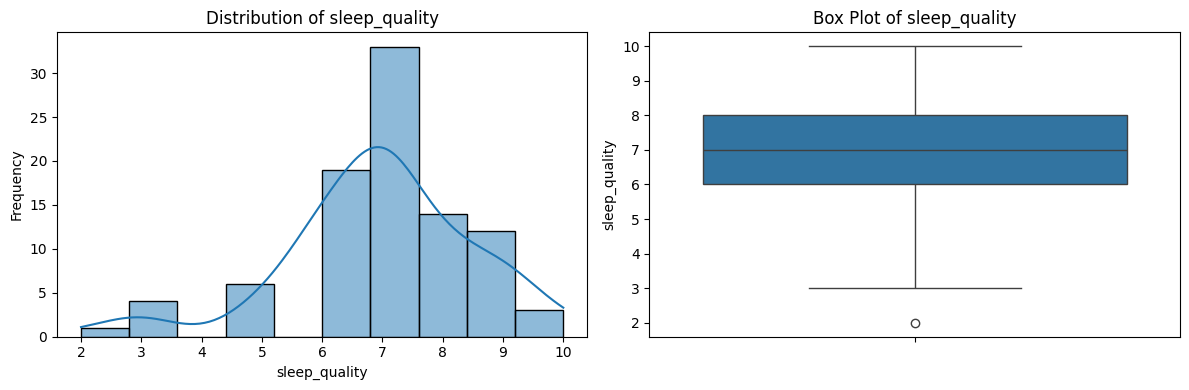

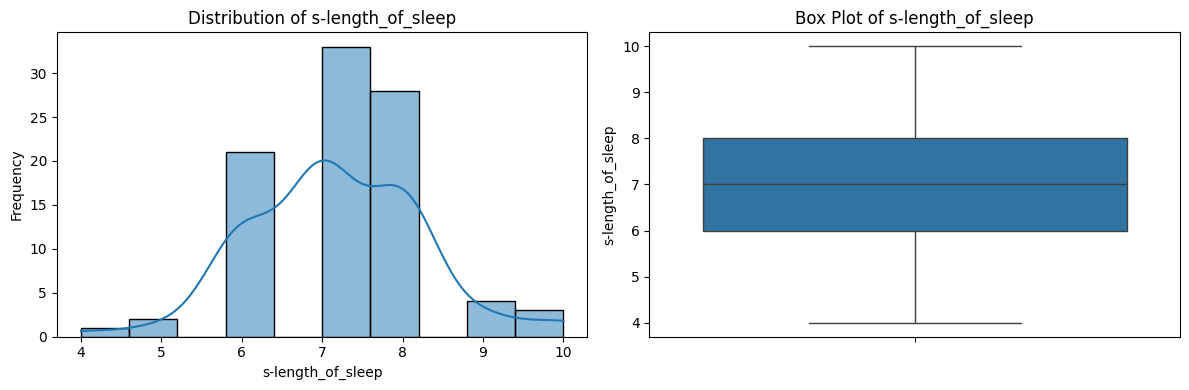

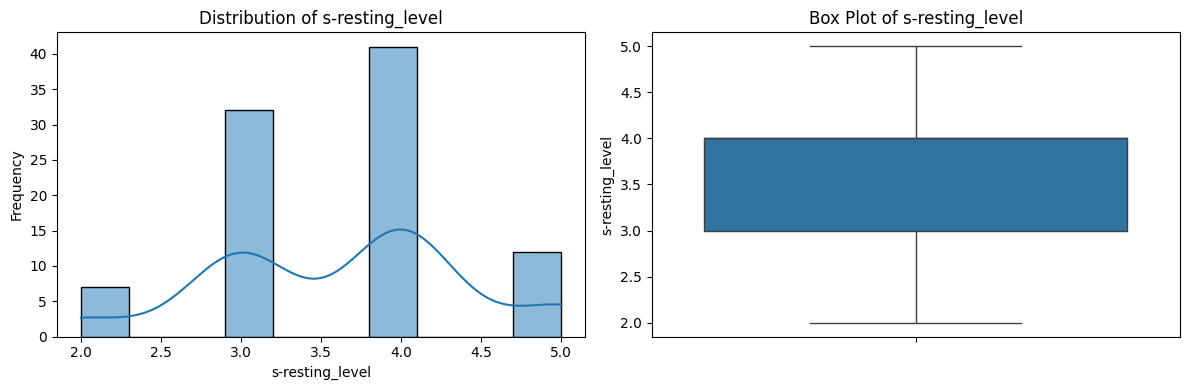

In [58]:
columns = [
    'sleep_quality',
    's-length_of_sleep',
    's-resting_level']
# Plot histograms and box plots for numeric columns
for column in columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(agg_data[column].dropna(), bins=10, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=agg_data[column].dropna())
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

#### Line Plot

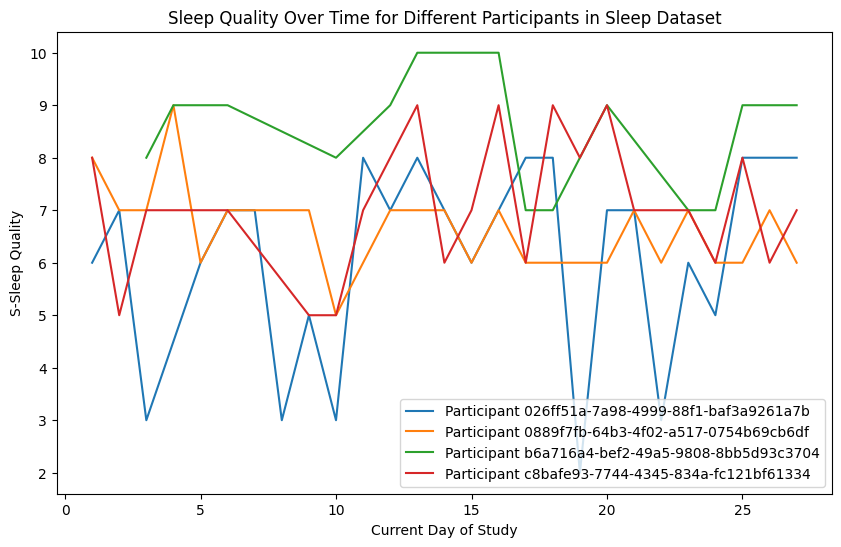

In [59]:
# Group the data by "participant_id"
grouped_data = agg_data.groupby("participant_id")

# Create a line plot for each participant
plt.figure(figsize=(10, 6))  # Set the figure size

for participant_id, group in grouped_data:
    plt.plot(group['current_day_of_study'], group['sleep_quality'], label=f'Participant {participant_id}')

# Add labels and title
plt.xlabel('Current Day of Study')
plt.ylabel('S-Sleep Quality')
plt.title('Sleep Quality Over Time for Different Participants in Sleep Dataset')

# Add legend
plt.legend()

# Show the plot
plt.show()


The line plot "Sleep Quality Over Time for Different Participants in Sleep Dataset" illustrates how sleep quality changes over the duration of the study for various participants in the dataset.

#### Scatterplot

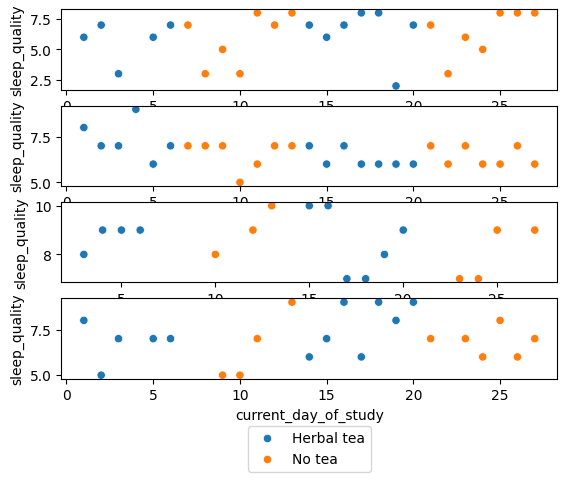

In [60]:
x = 'current_day_of_study'
y = 'sleep_quality'

participant_list= list(agg_data.participant_id.unique())
fig, axs = plt.subplots(len(participant_list))
for i in range(len(participant_list)):
  if i < len(participant_list)-1: legend=False
  else: legend=True
  sns.scatterplot(
    data=agg_data[agg_data["participant_id"]==participant_list[i]],
    x = x, y = y, hue='current_intervention_name',
    ax=axs[i], legend = legend
  )
axs[len(participant_list)-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5))

The scatterplot represents the variability of the sleep quality recording for all 4 participants over the course of the study, colourcoded is the intervention tea (blue) and no tea (orange) before going to bed.

#### Correlations

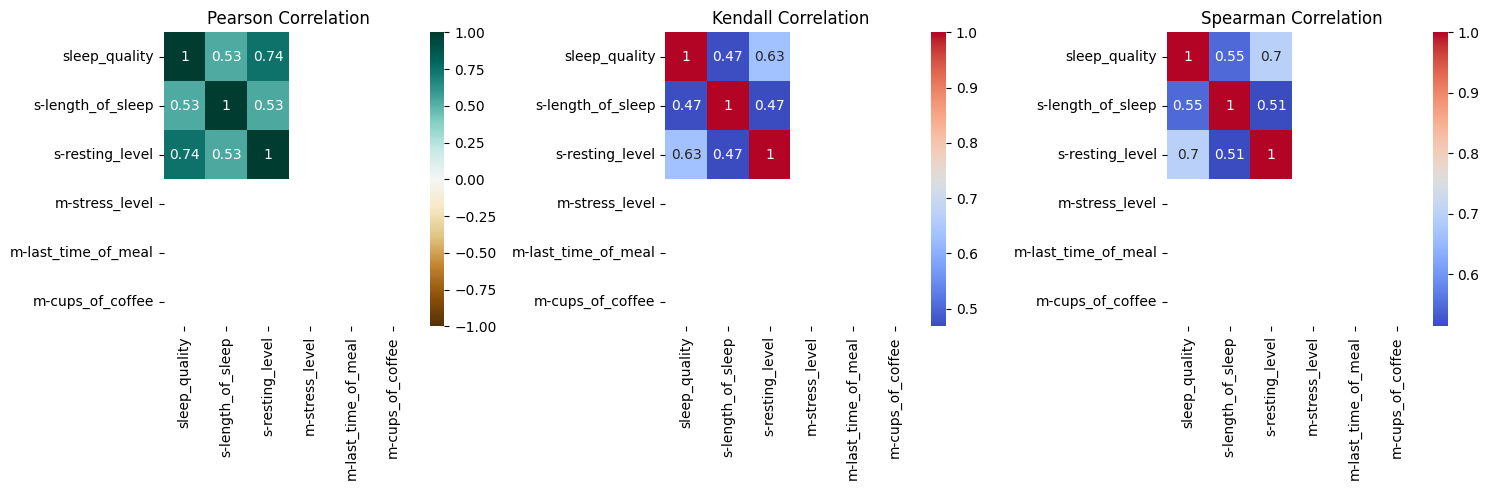

In [62]:
# Select the columns you want to include in the correlation matrix
columns_to_include = [
    'sleep_quality',
    's-length_of_sleep',
    's-resting_level',
    'm-stress_level',
    'm-last_time_of_meal',
    'm-cups_of_coffee'
]

# Calculate correlation matrices for different correlation types
correlation_pearson = agg_data[columns_to_include].corr(method='pearson')
correlation_kendall = agg_data[columns_to_include].corr(method='kendall')
correlation_spearman = agg_data[columns_to_include].corr(method='spearman')

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create heatmaps for each correlation type
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True, cmap='BrBG',ax=axes[0], center=0)
axes[0].set_title('Pearson Correlation')

sns.heatmap(correlation_kendall, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Kendall Correlation')

sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Spearman Correlation')

# Adjust the layout
plt.tight_layout()
plt.show()


## Baseline Study - Tea (Sleep)

### Completed Dataset

In [66]:
agg_data_all.head(40)

,measurement_name,participant_id,current_day_of_study,current_intervention_name,sleep_quality,s-length_of_sleep,s-resting_level,m-stress_level,m-last_time_of_meal,m-cups_of_coffee,m-last_time_coffee,m-special_event
0,Mediators,026ff51a-7a98-4999-88f1-baf3a9261a7b,27,No tea,NaN,NaN,NaN,4.0,[22.00_-_24.00],2.0,[14.00_-_16.00],False
1,Sleep,026ff51a-7a98-4999-88f1-baf3a9261a7b,27,No tea,8.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN
2,Mediators,026ff51a-7a98-4999-88f1-baf3a9261a7b,26,No tea,NaN,NaN,NaN,4.0,[20.00_-_22.00],3.0,[16.00_-_18.00],False
3,Sleep,026ff51a-7a98-4999-88f1-baf3a9261a7b,26,No tea,8.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
4,Mediators,026ff51a-7a98-4999-88f1-baf3a9261a7b,25,No tea,NaN,NaN,NaN,1.0,[18.00_-_20.00],1.0,[before_14.00],False
5,Sleep,026ff51a-7a98-4999-88f1-baf3a9261a7b,25,No tea,8.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN
6,Mediators,026ff51a-7a98-4999-88f1-baf3a9261a7b,24,No tea,NaN,NaN,NaN,2.0,[20.00_-_22.00],2.0,[16.00_-_18.00],True
7,Sleep,026ff51a-7a98-4999-88f1-baf3a9261a7b,24,No tea,5.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN
8,Mediators,026ff51a-7a98-4999-88f1-baf3a9261a7b,23,No tea,NaN,NaN,NaN,2.0,[18.00_-_20.00],1.0,[before_14.00],True
9,Sleep,026ff51a-7a98-4999-88f1-baf3a9261a7b,23,No tea,6.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN


### Estimating Treatment Effect using Linear Regression with autoregressive errors

In [89]:
agg_data_df = agg_data.copy()

In [90]:
# Linear regression
fit = ols("sleep_quality ~ current_intervention_name", data=agg_data_df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:          sleep_quality   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.649
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.202
Time:                        13:02:22   Log-Likelihood:                -169.96
No. Observations:                  92   AIC:                             343.9
Df Residuals:                      90   BIC:                             349.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

                    Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       sleep_quality
No. Observations:        92            Method:                   REML         
No. Groups:              4             Scale:                    1.8079       
Min. group size:         17            Log-Likelihood:           -161.9570    
Max. group size:         27            Converged:                Yes          
Mean group size:         23.0                                                 
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            7.212    0.518 13.934 0.000  6.198  8.227
current_intervention_name[T.No tea] -0.282    0.282 -1.001 0.317 -0.835  0.270
participant_id Var                   0.917    0.625                      

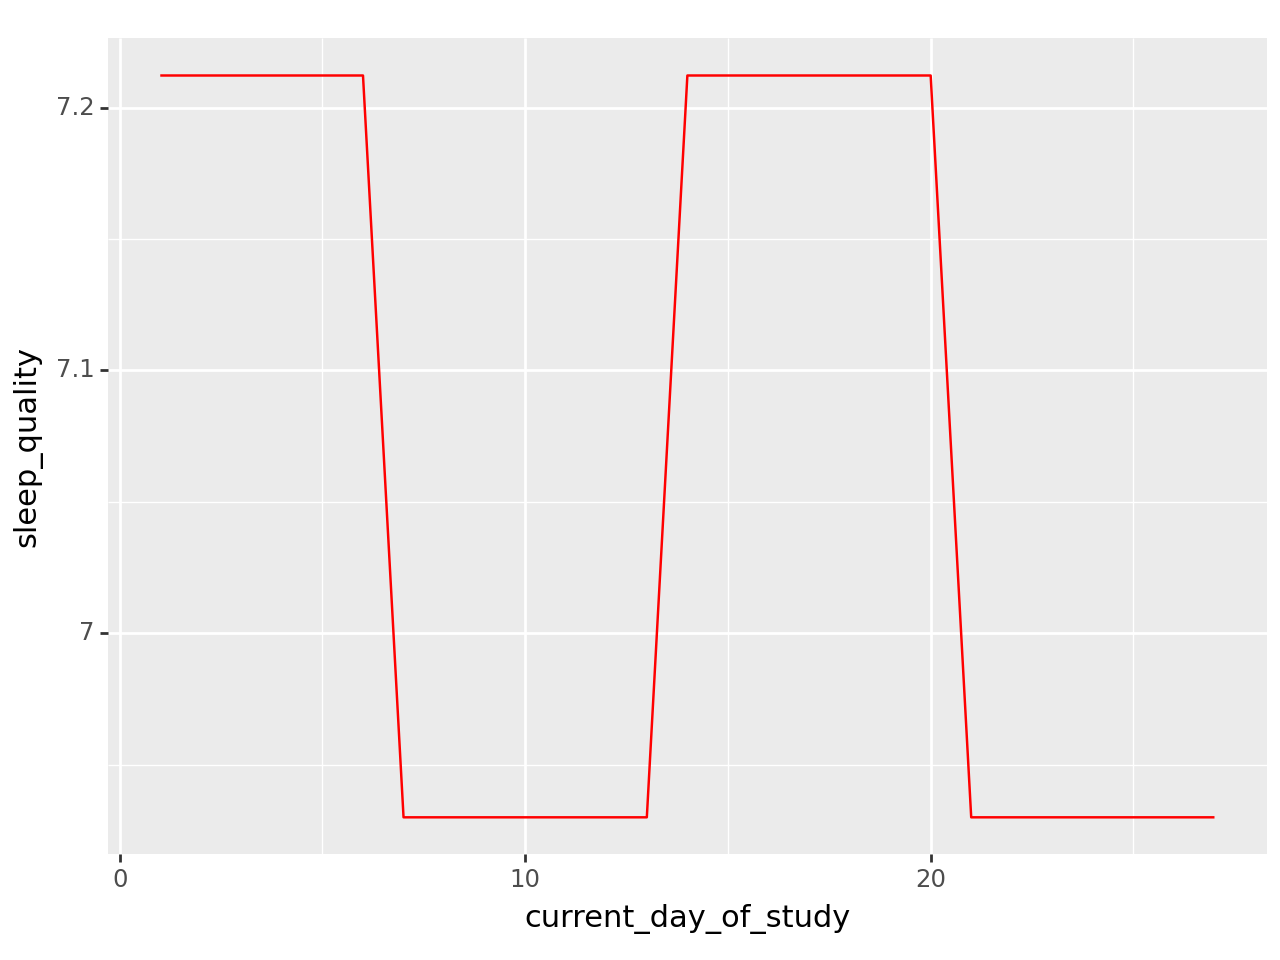

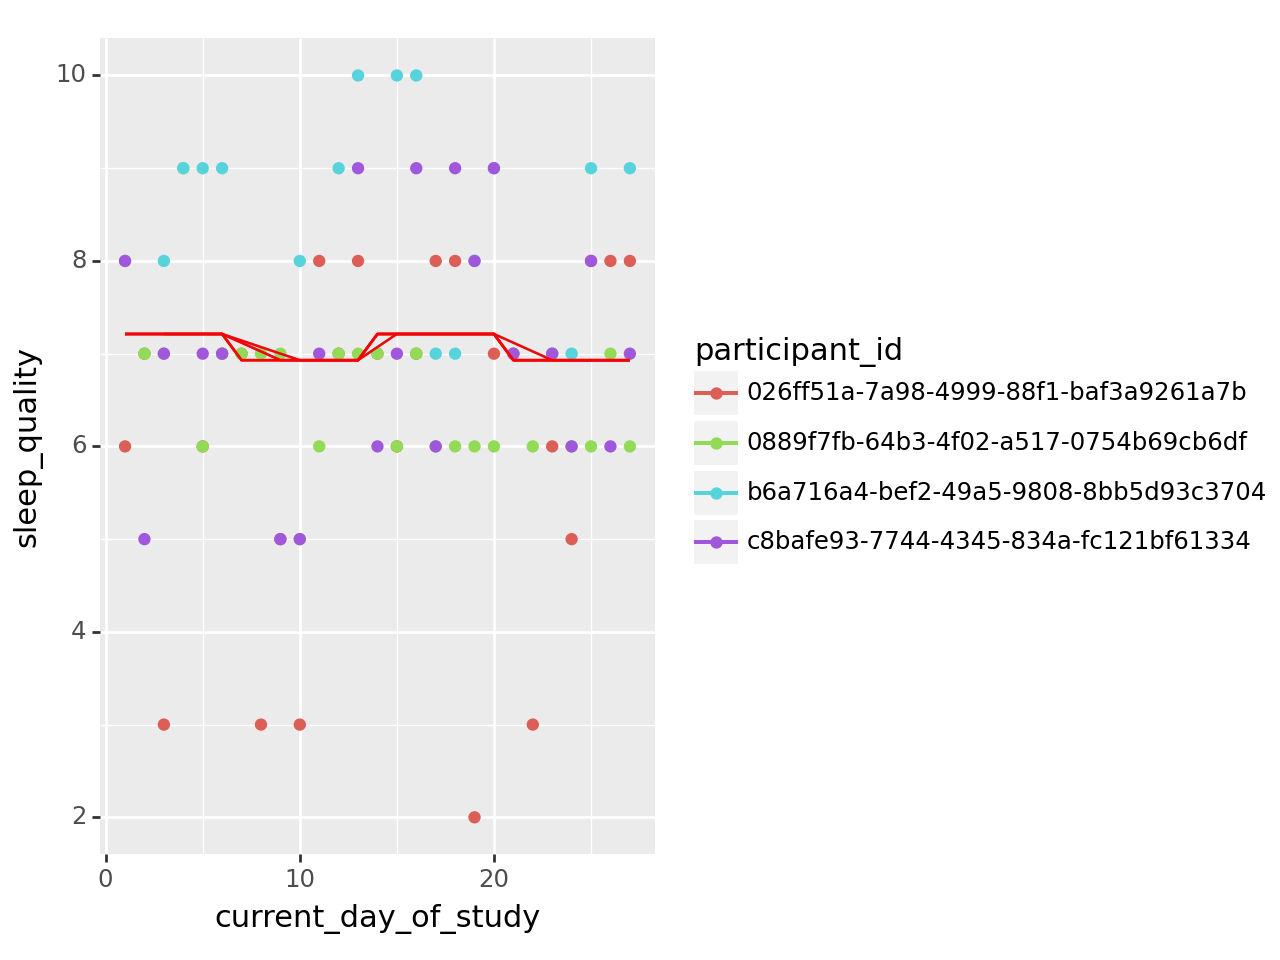

In [99]:
# Mixed model with AR1 correlation
fit3 = MixedLM.from_formula("sleep_quality ~ current_intervention_name",
                            groups="participant_id", re_formula="1", data=agg_data_df)
result3 = fit3.fit()
print(result3.summary())

# Extract predicted values
pred_fit3 = result3.predict()

# Visualization of predicted values
plot1 = (ggplot(agg_data_df, aes(x='current_day_of_study', y='sleep_quality')) +
         stat_summary(aes(y=pred_fit3), fun_y=np.mean, color="red", geom="line"))
print(plot1)

# Predicted trajectories for a couple of persons and their actual values, plus the overall estimate
plot2 = (ggplot(agg_data_df, aes(x='current_day_of_study', y='sleep_quality', group='participant_id', color='participant_id')) +
         geom_point() +
         geom_line(aes(y=pred_fit3, group='participant_id', color='participant_id')) +
         stat_summary(aes(y=pred_fit3), fun_y=np.mean, color="red", geom="line"))
print(plot2)

                           GLSAR Regression Results                           
Dep. Variable:          sleep_quality   R-squared:                       0.020
Model:                          GLSAR   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.824
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.180
Time:                        13:15:48   Log-Likelihood:                -168.33
No. Observations:                  91   AIC:                             340.7
Df Residuals:                      89   BIC:                             345.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

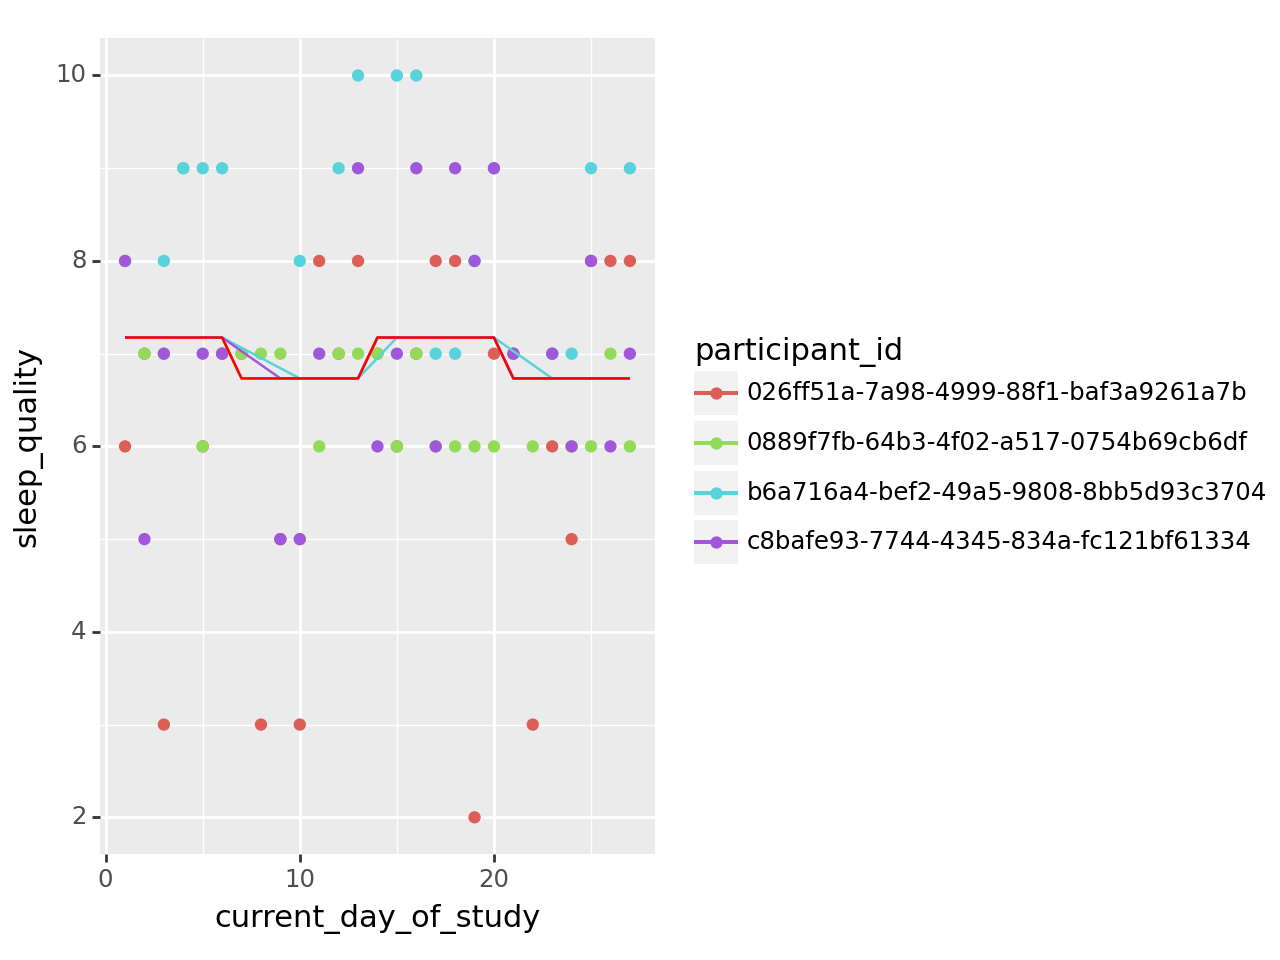

In [111]:
# Linear regression with AR using GLSAR
formula = "sleep_quality ~ current_intervention_name"
model = sm.GLSAR.from_formula(formula, rho=1, data=agg_data_df, missing='drop')
result4 = model.fit()
print(result4.summary())

# Extract predicted values for fit4
pred_fit4 = result4.predict()

# Visualization of predicted values using ggplot for fit4
plot3 = (ggplot(agg_data_df, aes(x='current_day_of_study', y='sleep_quality')) +
         geom_point(aes(color='participant_id')) +
         geom_line(aes(y=pred_fit4, group='participant_id', color='participant_id')) +
         stat_summary(aes(y=pred_fit4), fun_y=np.mean, color="red", geom="line"))

# Display the plot
print(plot3)